<h3>Splitting the dataset into test and train</h3>

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
from sklearn.model_selection import train_test_split

# Set image size and batch size
IMG_SIZE = 128
BATCH_SIZE = 32

# Base directory of your dataset
base_dir = 'cats_vs_dogs/kagglecatsanddogs_3367a/PetImages/'
cat_dir = os.path.join(base_dir, 'Cat')
dog_dir = os.path.join(base_dir, 'Dog')

# Temporary directories for train/test split
train_dir = 'data/train/'
test_dir = 'data/test/'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
for category in ['Cat', 'Dog']:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

# Get list of images
cat_images = [os.path.join(cat_dir, fname) for fname in os.listdir(cat_dir) if fname.endswith('.jpg')]
dog_images = [os.path.join(dog_dir, fname) for fname in os.listdir(dog_dir) if fname.endswith('.jpg')]

# Split into train and test (80% train, 20% test)
cat_train, cat_test = train_test_split(cat_images, test_size=0.2, random_state=42)
dog_train, dog_test = train_test_split(dog_images, test_size=0.2, random_state=42)

# Copy files to train/test directories
for img in cat_train:
    shutil.copy(img, os.path.join(train_dir, 'Cat', os.path.basename(img)))
for img in cat_test:
    shutil.copy(img, os.path.join(test_dir, 'Cat', os.path.basename(img)))
for img in dog_train:
    shutil.copy(img, os.path.join(train_dir, 'Dog', os.path.basename(img)))
for img in dog_test:
    shutil.copy(img, os.path.join(test_dir, 'Dog', os.path.basename(img)))

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess images from the new train/test directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Cat = 0, Dog = 1
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Check the number of images loaded
print(f"Training samples: {train_generator.samples}")
print(f"Testing samples: {test_generator.samples}")

Found 19967 images belonging to 2 classes.
Found 4992 images belonging to 2 classes.
Training samples: 19967
Testing samples: 4992


<h3>Data Preprocessing</h3>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set image size and batch size
IMG_SIZE = 128
BATCH_SIZE = 32

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess images from directories
train_generator = train_datagen.flow_from_directory(
    'data/train/',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Cats = 0, Dogs = 1
)

test_generator = test_datagen.flow_from_directory(
    'data/test/',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 19967 images belonging to 2 classes.
Found 4992 images belonging to 2 classes.


<h3>Building the CNN Model</h3>

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevents overfitting
    Dense(1, activation='sigmoid')  # Binary output: 0 (cat) or 1 (dog)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()  # See the architecture

C:\Users\paras\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
#simpler model to reduce overfitting
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define a simpler model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),  # Fewer filters: 32 → 16
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),  # Fewer filters: 64 → 32, one less conv layer
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),  # Smaller dense layer: 128 → 64
    Dropout(0.5),  # Keep dropout for regularization
    Dense(1, activation='sigmoid')  # Binary output: Cat (0) or Dog (1)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()  # Check the architecture

C:\Users\paras\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,843,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,848,417 (7.05 MB)

 Trainable params: 1,848,417 (7.05 MB)

 Non-trainable params: 0 (0.00 B)

<h3>Train the model</h3>

In [3]:
history = model.fit(
    train_generator,
    epochs=8,  # Adjust based on performance
    validation_data=test_generator
)

C:\Users\paras\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
167/624 ━━━━━━━━━━━━━━━━━━━━ 54s 120ms/step - accuracy: 0.5702 - loss: 0.8152 

C:\Users\paras\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


624/624 ━━━━━━━━━━━━━━━━━━━━ 90s 142ms/step - accuracy: 0.6237 - loss: 0.6914 - val_accuracy: 0.7372 - val_loss: 0.5205
Epoch 2/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 63s 100ms/step - accuracy: 0.7514 - loss: 0.5129 - val_accuracy: 0.7554 - val_loss: 0.4911
Epoch 3/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 65s 104ms/step - accuracy: 0.7868 - loss: 0.4573 - val_accuracy: 0.7792 - val_loss: 0.4597
Epoch 4/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 65s 105ms/step - accuracy: 0.8135 - loss: 0.4121 - val_accuracy: 0.7722 - val_loss: 0.4863
Epoch 5/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 65s 105ms/step - accuracy: 0.8369 - loss: 0.3663 - val_accuracy: 0.7849 - val_loss: 0.4748
Epoch 6/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 193s 309ms/step - accuracy: 0.8588 - loss: 0.3199 - val_accuracy: 0.7955 - val_loss: 0.4680
Epoch 7/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 62s 100ms/step - accuracy: 0.8882 - loss: 0.2615 - val_accuracy: 0.7949 - val_loss: 0.4933
Epoch 8/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 64s 103ms/step - accuracy: 0.9116 - loss: 0.2143 - val_accur

<h3>Evaluate and Visualize</h3>

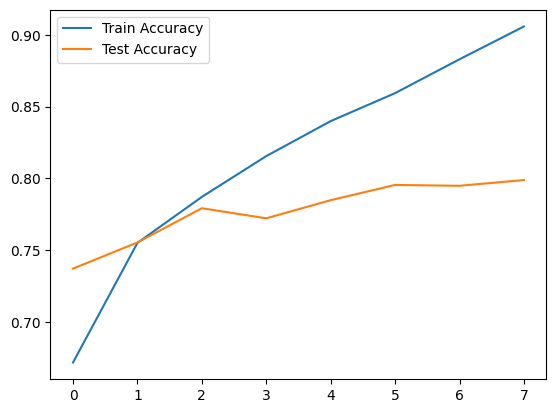

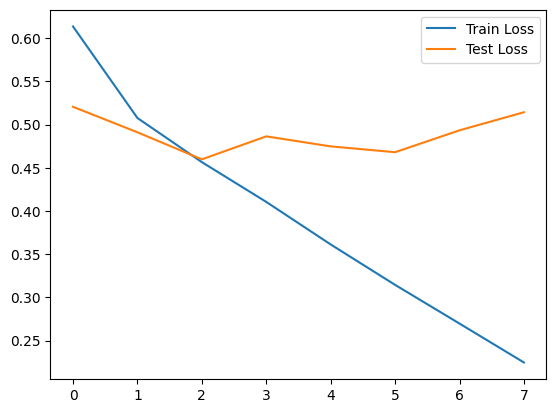

In [4]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()

<h3>Save the model</h3>

In [5]:
# Save the model
model.save('cats_vs_dogs_cnn.h5')
print("Model saved as 'cats_vs_dogs_cnn.h5'")

Model saved as 'cats_vs_dogs_cnn.h5'


<h3>Load the model and test it out</h3>

Model loaded successfully
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


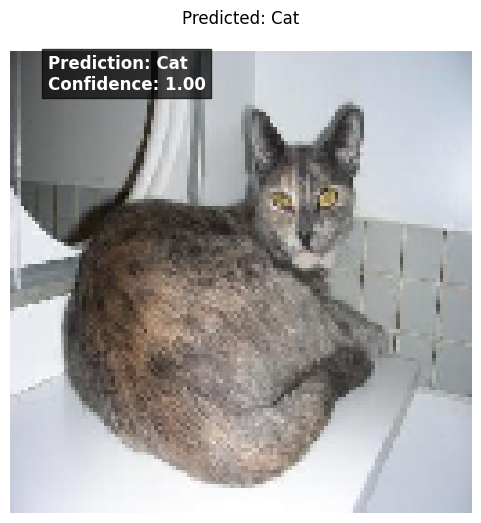

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
loaded_model = load_model('cats_vs_dogs_cnn.h5')
print("Model loaded successfully")

# Set image size (must match training)
IMG_SIZE = 128

# Load and preprocess a new image
img_path = '30.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = loaded_model.predict(img_array)
#prediction = model.predict(img_array)
label = "Dog" if prediction[0] > 0.5 else "Cat"
confidence = prediction[0][0] if label == "Dog" else 1 - prediction[0][0]  # Confidence score

# Plot the image with the predicted label
plt.figure(figsize=(6, 6))  # Set figure size
plt.imshow(img)  # Display the original image
plt.axis('off')  # Hide axes

# Add the predicted label and confidence as text on the image
plt.text(10, 10, f'Prediction: {label}\nConfidence: {confidence:.2f}', 
         color='white', fontsize=12, weight='bold',
         bbox=dict(facecolor='black', alpha=0.7))  # Black background for readability

plt.title(f'Predicted: {label}', pad=20)
plt.show()